# Pendulo simple

Un péndulo simple es un modelo idealizado que consiste en una partícula de masa m suspendida de un punto fijo mediante un hilo inextensible y de masa despreciable en un campo gravitacional uniforme. Cuando el cuerpo se desvía de su posición de equilibrio y se libera, empieza a oscilar a lado y lado de esa posición

Algunas características del péndulo simple son:

1. El periodo del péndulo es independiente de la amplitud de su movimiento.
2. El periodo del péndulo depende únicamente de la longitud del hilo.
3. El péndulo simple es un ejemplo de sistema conservativo, ya que la energía se conserva a lo largo del movimiento.

## Demostración

La partícula se mueve sobre un arco de circunferencia bajo la acción de dos fuerzas: su propio peso (mg) y la tensión del hilo (N), siendo la fuerza motriz la componente tangencial del peso. Aplicando la segunda ley de Newton obtenemos:

$$
F_t = -mg\sin{(\theta)}=ma_t
$$

siendo at, la aceleración tangencial y donde hemos incluido el signo negativo para expresar que la fuerza tangencial tiene siempre sentido opuesto al desplazamiento (fuerza recuperadora). Al tratarse de un movimiento circular, se puede proponer que:

$$
a_t = l \ddot{\theta}
$$

siendo $\ddot{\theta}$ la aceleración angular, de modo que la ec. dif. del movimiento es:

$$
-mg\sin{(\theta)}=ml\ddot{\theta}
\rightarrow
l\ddot{\theta} + g\sin{(\theta)}=0
$$



L= 2
theta (radianes)= 0.5
Omega= 0
Tiempo inicial= 0
Tiempo final= 3
Pasos de tiempo= 0.1
Ángulos (θ) a lo largo del tiempo:
['0.5000', '0.4883', '0.4536', '0.3976', '0.3226', '0.2322', '0.1305', '0.0225', '-0.0867', '-0.1916', '-0.2872', '-0.3690', '-0.4331', '-0.4768', '-0.4980', '-0.4959', '-0.4705', '-0.4230', '-0.3555', '-0.2709', '-0.1733', '-0.0672', '0.0421', '0.1494', '0.2494', '0.3373', '0.4091', '0.4615', '0.4921', '0.4996', '0.4837']





Velocidades angulares (ω) a lo largo del tiempo:
['0.0000', '-0.2335', '-0.4568', '-0.6601', '-0.8335', '-0.9683', '-1.0571', '-1.0947', '-1.0789', '-1.0107', '-0.8940', '-0.7353', '-0.5432', '-0.3269', '-0.0963', '0.1384', '0.3671', '0.5798', '0.7666', '0.9182', '1.0267', '1.0857', '1.0919', '1.0448', '0.9473', '0.8050', '0.6255', '0.4179', '0.1920', '-0.0422', '-0.2746']


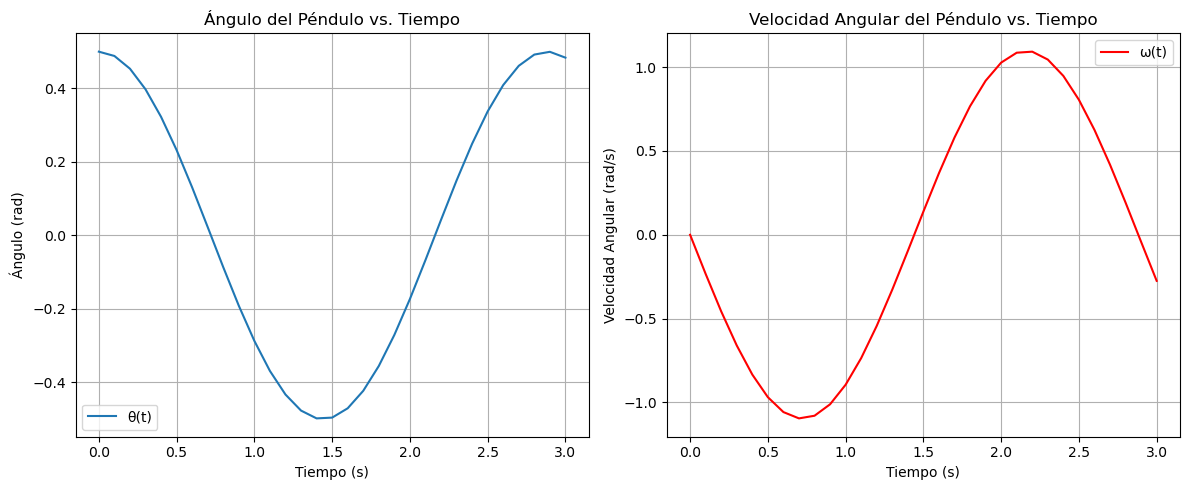

In [13]:
import numpy as np
import matplotlib.pyplot as plt

#definir el sistema de ecuaciones difereniales
g=9.81

def sistema_pendulo(t, y):
    theta, omega=y
    dtheta_dt=omega
    domega_dt=-(g/L)*np.sin(theta)
    return np.array([dtheta_dt, domega_dt])
    
#aplicar rk4
def rk4(f,y0,t):
    n=len(t)
    y=np.zeros((n, len(y0)))
    y[0]=y0
    
    for i in range (1, n):
        h=t[i]-t[i-1]
        k1=h*(f(t[i-1], y[i-1]))
        k2=h*(f(t[i-1]+h/2, y[i-1]+k1/2))
        k3=h*(f(t[i-1]+h/2, y[i-1]+k2/2))
        k4=h*(f(t[i],y[i-1]+k3))
        y[i]=y[i-1]+(k1+(2*k2)+(2*k3)+k4)/6
    return y


#ingreso de datos
longitud_cuerda=float(input('L= '))
theta=float(input('theta (radianes)= '))
omega=float(input('Omega= '))
y0=np.array([theta, omega])

ti=float(input('Tiempo inicial= '))
tf=float(input('Tiempo final= '))
dif_t=float(input('Pasos de tiempo= '))
t=np.arange(ti,tf+dif_t, dif_t)

#resolver sistema
sol=rk4(sistema_pendulo, y0, t)

#solucines
theta=sol[:,0]
omega=sol[:,1]
#lista soluciones
theta_list = [f"{val:.4f}" for val in theta]
omega_list = [f"{val:.4f}" for val in omega]
#theta_list = theta.tolist()
#omega_list = omega.tolist()
#solucion listado
print("Ángulos (θ) a lo largo del tiempo:")
print(theta_list)
print('\n\n\n')
print("\nVelocidades angulares (ω) a lo largo del tiempo:")
print(omega_list)

# Graficar los resultados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(t, theta, label='θ(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Ángulo del Péndulo vs. Tiempo')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t, omega, label='ω(t)', color='r')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad Angular (rad/s)')
plt.title('Velocidad Angular del Péndulo vs. Tiempo')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
